In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/good-bad/dataset2022.xlsx


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 数据预处理-基本描述 1.2

In [44]:
# 加载数据
df = pd.read_excel('/kaggle/input/good-bad/dataset2022.xlsx', index_col=[0])
print(df.shape)
df.head(5)

(20000, 50)


,member_id,loan_status,loan_amnt,issue_d,term,int_rate,installment,grade,emp_length,home_ownership,FICO,annual_inc,loantoincome,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11435650,13367814,Fully Paid,32000,2020-01-14,36 months,0.0967,1027.60,B,3 years,MORTGAGE,700,104000.00,0.307692,19.36,0,0,11,0,22217,0.534,18,237885,41600,4,21626,14883.0,59.9,99.0,112,4,4,2,4.0,0,6,6,7,8,6,8,10,6,11,2,94.4,14.3,292644,39963,37100,48756
11385707,13327865,Fully Paid,5000,2020-01-14,36 months,0.1922,183.84,D,2 years,RENT,670,32615.00,0.153304,23.63,0,1,7,0,6806,0.473,18,32010,14400,10,4573,5694.0,54.4,49.0,51,2,1,0,3.0,0,2,2,3,5,6,5,12,2,7,5,100.0,66.7,41740,32010,12500,27340
11405625,13337797,Fully Paid,19750,2020-01-14,36 months,0.1398,674.82,C,< 1 year,RENT,675,55000.00,0.359091,28.04,0,1,19,0,26315,0.256,25,70229,102800,3,3902,74204.0,25.3,49.0,242,4,4,0,4.0,0,7,8,10,12,9,12,16,8,19,2,100.0,40.0,143760,70229,99400,40960
11375637,13307791,Fully Paid,3500,2020-01-14,36 months,0.1353,118.83,B,10+ years,RENT,660,49445.88,0.070784,5.95,0,0,9,1,4766,0.596,31,4766,8000,1,794,506.0,77.0,145.0,226,13,13,3,25.0,4,3,6,6,17,4,9,24,6,9,0,92.3,100.0,8000,4766,2200,0
11405664,13337837,Fully Paid,4000,2020-01-14,36 months,0.0662,122.82,A,2 years,OWN,715,42000.00,0.095238,25.11,0,0,19,0,3967,0.381,28,108141,10400,1,5692,4611.0,45.8,76.0,77,11,11,0,11.0,0,2,3,4,4,23,5,5,3,19,1,100.0,0.0,116674,108141,8500,106274


In [45]:
# 查看全部变量缺失值情况
'''
emp_length                    1067
c_open_to_buy                 152
bc_util                        162
mo_sin_old_il_acct             561
mths_since_recent_bc           141
percent_bc_gt_75               169
'''
df.isnull().sum()

member_id                        0
loan_status                      0
loan_amnt                        0
issue_d                          0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                    1067
home_ownership                   0
FICO                             0
annual_inc                       0
loantoincome                     0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       5
total_acc                        0
tot_cur_bal                      0
total_rev_hi_lim                 0
acc_open_past_24mths             0
avg_cur_bal                      0
bc_open_to_buy                 152
bc_util                        162
mo_sin_old_il_acct             561
mo_sin_old_rev_tl_op

['3 years' '2 years' '< 1 year' '10+ years' '4 years' '8 years' '7 years'
 nan '5 years' '6 years' '9 years' '1 year']


<AxesSubplot:>

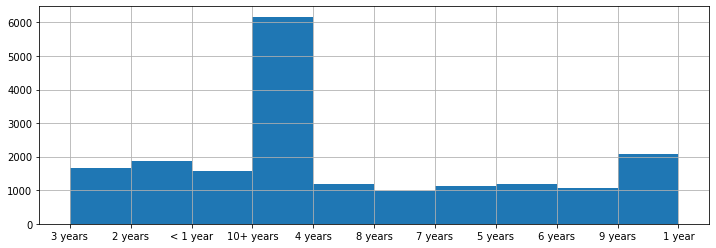

In [46]:
# 分析emp_length
print(df['emp_length'].unique())
df['emp_length'].hist(figsize=(12,4))

In [47]:
# 使用众数填充emp_length(理由众数占据的比例很明显，如果使用均值或者0值填充会比较大改变数据原始分布)
import statistics
df["emp_length"] = df["emp_length"].replace(np.NaN, statistics.mode(df["emp_length"]))

[14883.  5694. 74204. ... 59875. 10476. 20900.]


<AxesSubplot:>

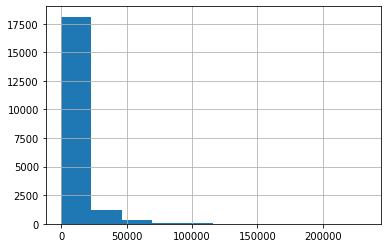

In [48]:
#分析 bc_open_to_buy
print(df['bc_open_to_buy'].unique())
df['bc_open_to_buy'].hist()

In [49]:
# 分析 bc_open_to_buy 使用中位数或者均值填充。因为数据集中分布且为连续变量
#Mean - 缺失值
df['bc_open_to_buy'] = df['bc_open_to_buy'].replace(np.NaN, df['bc_open_to_buy'].mean())

[ 59.9  54.4  25.3 ... 118.  109.8 149.1]


<AxesSubplot:>

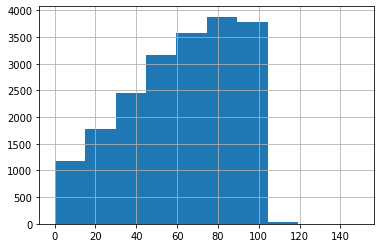

In [50]:
# 分析 bc_util 
print(df['bc_util'].unique())
df['bc_util'].hist()

In [51]:
# 填充 bc_util 使用中位数填充，数据为连续变量
df['bc_util'] = df['bc_util'].replace(np.NaN, df['bc_util'].median())

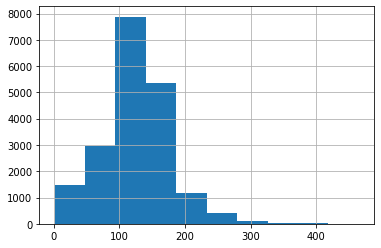

In [52]:
# mo_sin_old_il_acct
df['mo_sin_old_il_acct'].hist()
df['mo_sin_old_il_acct'] = df['mo_sin_old_il_acct'].replace(np.NaN, df['mo_sin_old_il_acct'].median())

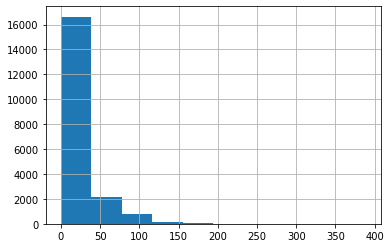

In [53]:
df['mths_since_recent_bc'].hist()
df['mths_since_recent_bc'] = df['mths_since_recent_bc'].replace(np.NaN, df['mths_since_recent_bc'].mean())

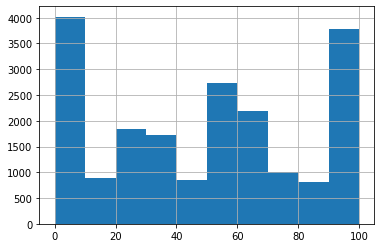

In [54]:
# percent_bc_gt_75 删除行
df['percent_bc_gt_75'].hist()
df.dropna(inplace=True)

In [55]:
# 查看缺失情况
df.isnull().sum()

member_id                     0
loan_status                   0
loan_amnt                     0
issue_d                       0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
FICO                          0
annual_inc                    0
loantoincome                  0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
mo_sin_old_il_acct            0
mo_sin_old_rev_tl_op          0
mo_sin_rcnt_rev_tl_op         0
mo_sin_rcnt_tl                0
mort_acc

## 数据预处理-多维描述1.3

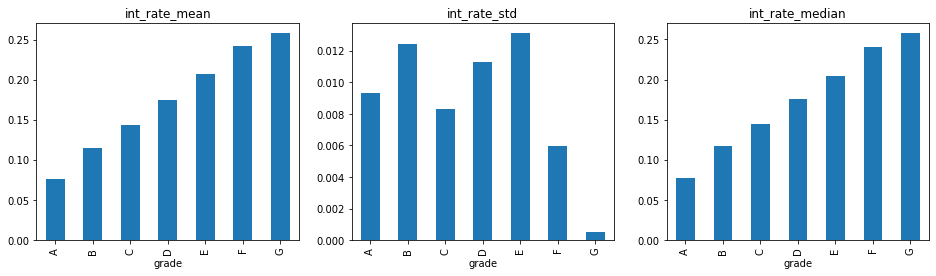

In [56]:
## 统计 FICO
def plot_fico(columns):
    fico = ['mean', 'std', 'median']
    rows = len(fico)
    cols = len(columns)
    fig = plt.figure(figsize=(16,4))
    for row in range(cols):
        for col in range(rows):
            ax1 = fig.add_subplot(cols,rows,row*rows+col+1)
            ax1.set_title('{}_{}'.format(columns[row],fico[col]))
            if col == 0:
                ax1 = df.groupby('grade')[columns[row]].mean().plot(kind='bar')
            if col == 1:
                ax1 = df.groupby('grade')[columns[row]].std().plot(kind='bar')
            if col == 2:
                ax1 = df.groupby('grade')[columns[row]].median().plot(kind='bar')
# plot_fico(['int_rate', 'loan_status', 'emp_length', 'home_ownership'])
plot_fico(['int_rate'])

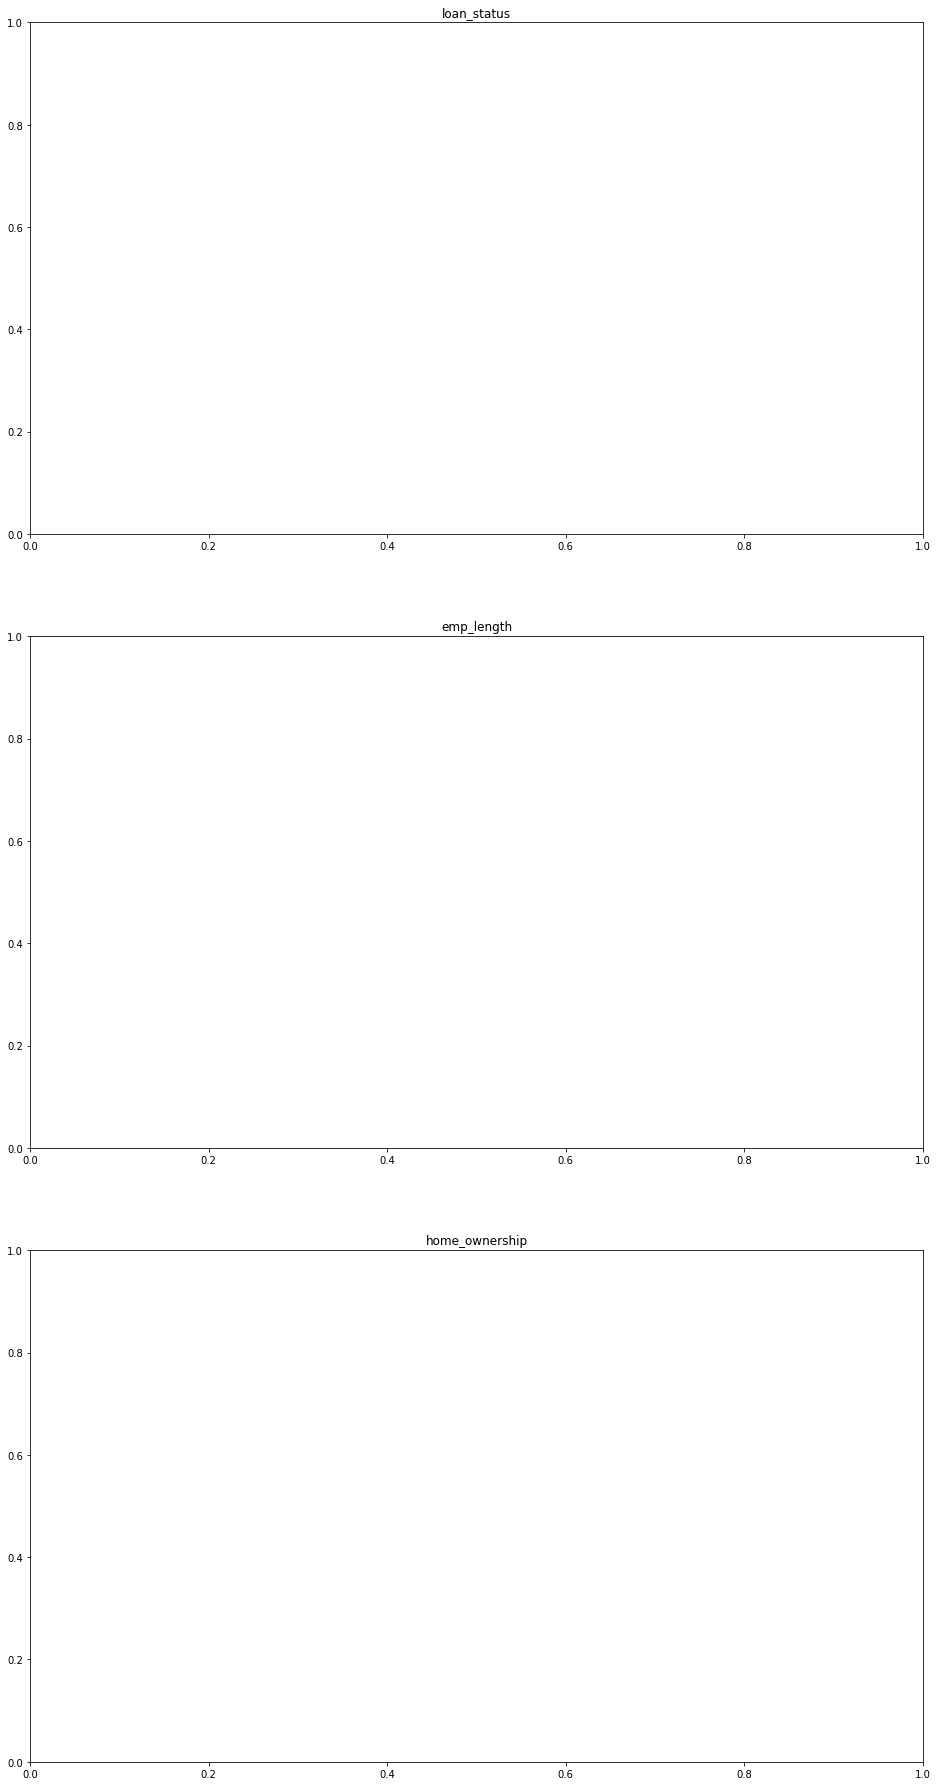

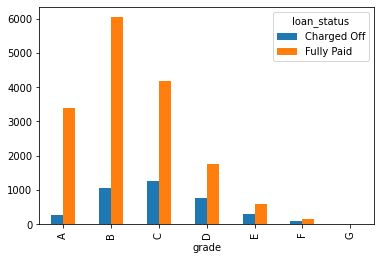

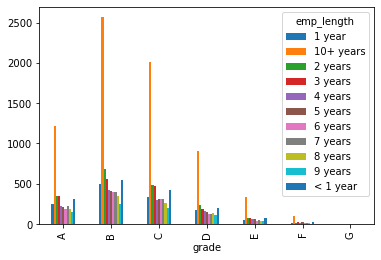

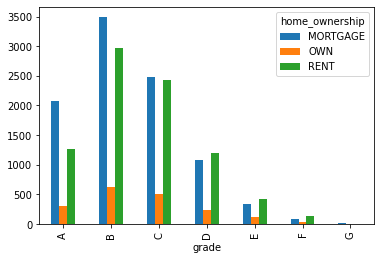

In [57]:
## 类别特征统计频数
fig = plt.figure(figsize=(16,32))
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_title('loan_status')
ax1 = df.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')
ax2 = fig.add_subplot(3, 1, 2)
ax2.set_title('emp_length')
ax2 = df.groupby('grade')['emp_length'].value_counts().unstack().plot(kind='bar')
ax3 = fig.add_subplot(3, 1, 3)
ax3.set_title('home_ownership')
ax3 = df.groupby('grade')['home_ownership'].value_counts().unstack().plot(kind='bar')

## 数据预处理-1.4数据变换

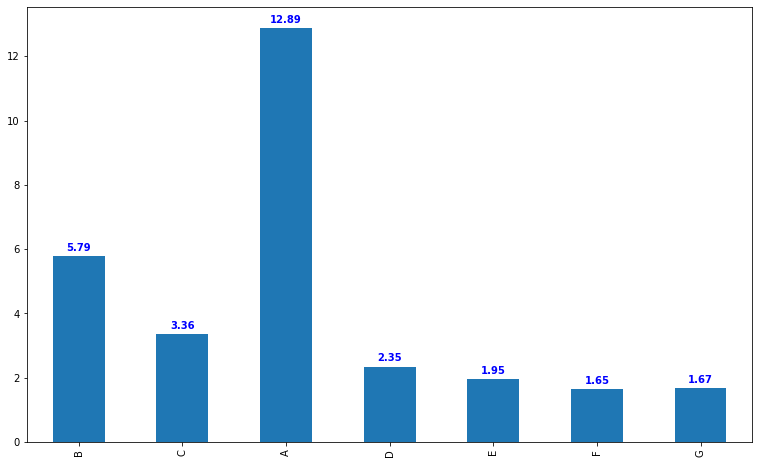

In [58]:
grade_vc = df['grade'].value_counts()
grade_ls_vc = df.groupby('grade')['loan_status'].value_counts()
grade_ls_vc = pd.DataFrame(grade_ls_vc)
grade_ls_vc.columns = ['loan_status_n']

# 求好坏比率
grade_level = pd.Series(grade_vc.index.tolist())
g_b = pd.DataFrame(index = grade_level,columns=list(['g_b','good','bad']))
for i in grade_level:
    grade_1 = grade_ls_vc.loc[(i,slice(None)),'loan_status_n']
    g_b.loc[i,'g_b'] = grade_1[0]/grade_1[1]
    g_b.loc[i,'good'] = grade_1[0]
    g_b.loc[i,'bad'] = grade_1[1]
# 绘制各分类柱状图
plt.figure(figsize=(13, 8))
g_b['g_b'].plot.bar()# one variable
for i, v in enumerate(g_b['g_b']):
    plt.text(i, v+0.1, '%.2f' % v, color='blue', fontweight='bold',ha='center', va= 'bottom',fontsize=10)

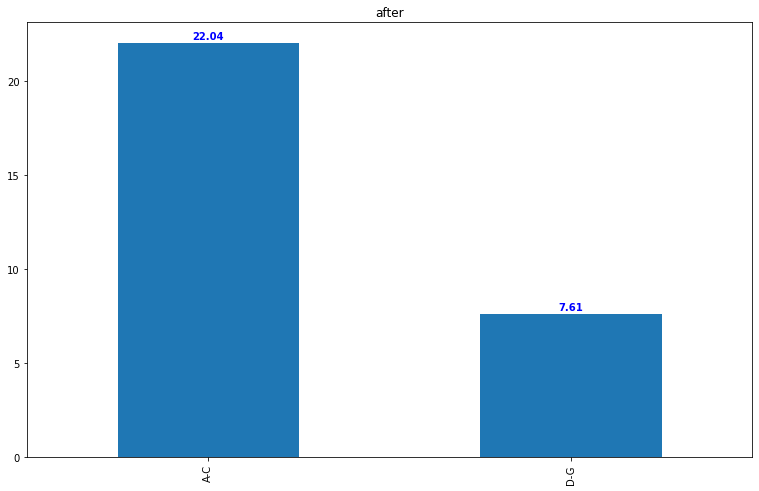

In [59]:
# 粗分类后。（A-C分为一类）（D-G分为一类）
g_b.loc['A-C'] = g_b.loc[['A','B', 'C'],:].apply(lambda x: x.sum())
g_b.loc['D-G'] = g_b.loc[['D','E','F','G'],:].apply(lambda x: x.sum())
g_b['g_b1'] = g_b['good']/g_b['bad']
g_b = g_b.drop(['A','B','C','D','E','F','G'])

plt.figure(figsize=(13, 8))
g_b['g_b'].plot.bar()# one variable
plt.title('after')
for i, v in enumerate(g_b['g_b']):
    plt.text(i, v+0.1, '%.2f' % v, color='blue', fontweight='bold',ha='center', va= 'bottom',fontsize=10)

## 数据预处理-1.5

In [60]:

# home_ownership各类别间没有比较的关系，转换成哑变量，避免比较关系
ho_ = pd.get_dummies(df['home_ownership'])
pd.merge(df, ho_, on='id')
ho_

,MORTGAGE,OWN,RENT
id,,,
11435650,1,0,0
11385707,0,0,1
11405625,0,0,1
11375637,0,0,1
11405664,0,1,0
...,...,...,...
20798851,1,0,0
20778925,1,0,0
20739103,0,1,0


In [61]:
# grade转换成递增的数字，因为数字和grade都隐含比较关系
def mapfunc(x):
    if x == 'A':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4
    if x == 'E':
        return 5
    if x == 'F':
        return 6
    if x == 'G':
        return 7
df['grade'].map(mapfunc)

id
11435650    2
11385707    4
11405625    3
11375637    2
11405664    1
           ..
20798851    1
20778925    3
20739103    2
20718887    5
20778858    1
Name: grade, Length: 19831, dtype: int64

## 数据可视化-2.1

<AxesSubplot:xlabel='int_rate'>

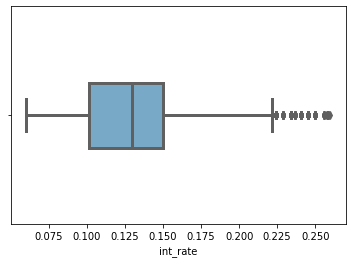

In [62]:
# int_rate箱形图
sns.boxplot(x=df['int_rate'], palette="Blues", width=0.3,linewidth=3)#Horizontal

<AxesSubplot:ylabel='Density'>

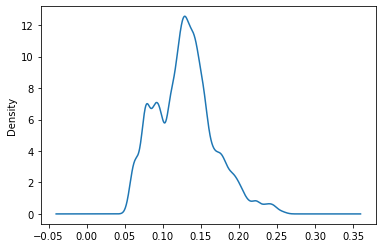

In [63]:
# int_rate概率密度图
df['int_rate'].plot.kde()

<AxesSubplot:ylabel='Density'>

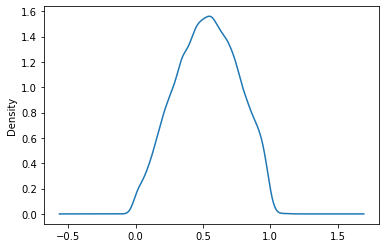

In [64]:
# revol_util的概率密度图
df['revol_util'].plot.kde()

## 数据可视化-2.2

<AxesSubplot:xlabel='grade'>

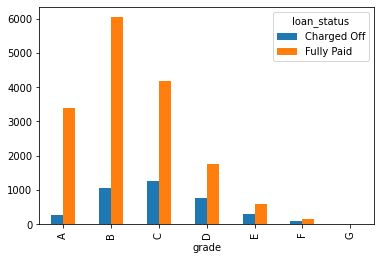

In [65]:
# 不同grade类别中的好人和坏人比例
df.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')

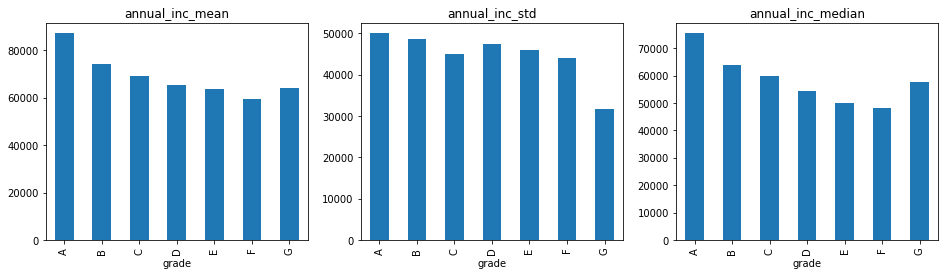

In [66]:
# 同一幅图FICO可以复用上面的代码 
## 统计 FICO
def plot_fico(columns, target):
    fico = ['mean', 'std', 'median']
    rows = len(fico)
    cols = len(columns)
    fig = plt.figure(figsize=(16,4))
    for row in range(cols):
        for col in range(rows):
            ax1 = fig.add_subplot(cols,rows,row*rows+col+1)
            ax1.set_title('{}_{}'.format(columns[row],fico[col]))
            if col == 0:
                ax1 = df.groupby(target)[columns[row]].mean().plot(kind='bar')
            if col == 1:
                ax1 = df.groupby(target)[columns[row]].std().plot(kind='bar')
            if col == 2:
                ax1 = df.groupby(target)[columns[row]].median().plot(kind='bar')
# plot_fico(['int_rate', 'loan_status', 'emp_length', 'home_ownership'])

# 传入不同的参数可以得到不同列的FICO
plot_fico(['annual_inc'], target='grade')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19831 entries, 11435650 to 20778858
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   member_id                   19831 non-null  int64         
 1   loan_status                 19831 non-null  object        
 2   loan_amnt                   19831 non-null  int64         
 3   issue_d                     19831 non-null  datetime64[ns]
 4   term                        19831 non-null  object        
 5   int_rate                    19831 non-null  float64       
 6   installment                 19831 non-null  float64       
 7   grade                       19831 non-null  object        
 8   emp_length                  19831 non-null  object        
 9   home_ownership              19831 non-null  object        
 10  FICO                        19831 non-null  int64         
 11  annual_inc                  19831 non-null  

In [68]:
pd.set_option('display.max_columns', None)
df.head()

,member_id,loan_status,loan_amnt,issue_d,term,int_rate,installment,grade,emp_length,home_ownership,FICO,annual_inc,loantoincome,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11435650,13367814,Fully Paid,32000,2020-01-14,36 months,0.0967,1027.60,B,3 years,MORTGAGE,700,104000.00,0.307692,19.36,0,0,11,0,22217,0.534,18,237885,41600,4,21626,14883.0,59.9,99.0,112,4,4,2,4.0,0,6,6,7,8,6,8,10,6,11,2,94.4,14.3,292644,39963,37100,48756
11385707,13327865,Fully Paid,5000,2020-01-14,36 months,0.1922,183.84,D,2 years,RENT,670,32615.00,0.153304,23.63,0,1,7,0,6806,0.473,18,32010,14400,10,4573,5694.0,54.4,49.0,51,2,1,0,3.0,0,2,2,3,5,6,5,12,2,7,5,100.0,66.7,41740,32010,12500,27340
11405625,13337797,Fully Paid,19750,2020-01-14,36 months,0.1398,674.82,C,< 1 year,RENT,675,55000.00,0.359091,28.04,0,1,19,0,26315,0.256,25,70229,102800,3,3902,74204.0,25.3,49.0,242,4,4,0,4.0,0,7,8,10,12,9,12,16,8,19,2,100.0,40.0,143760,70229,99400,40960
11375637,13307791,Fully Paid,3500,2020-01-14,36 months,0.1353,118.83,B,10+ years,RENT,660,49445.88,0.070784,5.95,0,0,9,1,4766,0.596,31,4766,8000,1,794,506.0,77.0,145.0,226,13,13,3,25.0,4,3,6,6,17,4,9,24,6,9,0,92.3,100.0,8000,4766,2200,0
11405664,13337837,Fully Paid,4000,2020-01-14,36 months,0.0662,122.82,A,2 years,OWN,715,42000.00,0.095238,25.11,0,0,19,0,3967,0.381,28,108141,10400,1,5692,4611.0,45.8,76.0,77,11,11,0,11.0,0,2,3,4,4,23,5,5,3,19,1,100.0,0.0,116674,108141,8500,106274


In [ ]:
'''以下变量需要单独处理
loan_status
issue_d
term
grade
emp_length
home_ownership
'''

In [83]:
# loan_status 0-1填充
print(df['loan_status'].unique())
df['loan_status'] = df['loan_status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

['Fully Paid' 'Charged Off']


In [85]:
# issue_d 使用LabelEncoder
print(df['issue_d'].unique())
from sklearn import preprocessing

enc=preprocessing.LabelEncoder()
df['issue_d'] = enc.fit_transform(df['issue_d'])


[0 1 2 3 4 5 6]


In [77]:
# 'term' 只有一个变量 直接删除
print(df['term'].unique())
df.drop('term', axis=1, inplace = True)

[' 36 months']


In [87]:
# 'grade' 
print(df['grade'].unique())
# grade转换成递增的数字，因为数字和grade都隐含比较关系
def mapfunc(x):
    if x == 'A':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4
    if x == 'E':
        return 5
    if x == 'F':
        return 6
    if x == 'G':
        return 7
df['grade'] = df['grade'].map(mapfunc)

['B' 'D' 'C' 'A' 'E' 'F' 'G']


In [92]:
# emp_length
# emp_length，因为隐含比较关系
def empfunc(x):
    if x == '1 year':
        return 1
    if x == '2 years':
        return 2
    if x == '3 years':
        return 3
    if x == '4 years':
        return 4
    if x == '5 years':
        return 5
    if x == '6 years':
        return 6
    if x == '7 years':
        return 7
    if x == '8 years':
        return 8
    if x == '9 years':
        return 9
    if x == '10+ years':
        return 10
    if x == '< 1 year':
        return 0
    return 0
print(df['emp_length'].unique())
df['emp_length'] = df['emp_length'].map(empfunc)

['3 years' '2 years' '< 1 year' '10+ years' '4 years' '8 years' '7 years'
 '5 years' '6 years' '9 years' '1 year']


In [96]:
# home_ownership
print(df['home_ownership'].unique())
df = df.join(pd.get_dummies(df['home_ownership'], prefix='h_o'))

['MORTGAGE' 'RENT' 'OWN']


In [99]:
df.drop('home_ownership', axis=1, inplace=True)

In [100]:
df.head()

,member_id,loan_status,loan_amnt,issue_d,int_rate,installment,grade,emp_length,FICO,annual_inc,loantoincome,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,h_o_MORTGAGE,h_o_OWN,h_o_RENT
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11435650,13367814,1,32000,0,0.0967,1027.60,2,3,700,104000.00,0.307692,19.36,0,0,11,0,22217,0.534,18,237885,41600,4,21626,14883.0,59.9,99.0,112,4,4,2,4.0,0,6,6,7,8,6,8,10,6,11,2,94.4,14.3,292644,39963,37100,48756,1,0,0
11385707,13327865,1,5000,0,0.1922,183.84,4,2,670,32615.00,0.153304,23.63,0,1,7,0,6806,0.473,18,32010,14400,10,4573,5694.0,54.4,49.0,51,2,1,0,3.0,0,2,2,3,5,6,5,12,2,7,5,100.0,66.7,41740,32010,12500,27340,0,0,1
11405625,13337797,1,19750,0,0.1398,674.82,3,0,675,55000.00,0.359091,28.04,0,1,19,0,26315,0.256,25,70229,102800,3,3902,74204.0,25.3,49.0,242,4,4,0,4.0,0,7,8,10,12,9,12,16,8,19,2,100.0,40.0,143760,70229,99400,40960,0,0,1
11375637,13307791,1,3500,0,0.1353,118.83,2,10,660,49445.88,0.070784,5.95,0,0,9,1,4766,0.596,31,4766,8000,1,794,506.0,77.0,145.0,226,13,13,3,25.0,4,3,6,6,17,4,9,24,6,9,0,92.3,100.0,8000,4766,2200,0,0,0,1
11405664,13337837,1,4000,0,0.0662,122.82,1,2,715,42000.00,0.095238,25.11,0,0,19,0,3967,0.381,28,108141,10400,1,5692,4611.0,45.8,76.0,77,11,11,0,11.0,0,2,3,4,4,23,5,5,3,19,1,100.0,0.0,116674,108141,8500,106274,0,1,0


## LDA

In [101]:
X, y = df.drop('loan_status', axis=1), df['loan_status']

In [102]:
## 分割测试集和训练集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

lda = LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)
prediction = lda.predict(X_test)
print('准确率: ', accuracy_score(prediction, y_test))
print('召回率: ', recall_score(prediction, y_test))
print('F1: ', f1_score(prediction, y_test))

准确率:  0.817998487522057
召回率:  0.8228336333247621
F1:  0.8986239820275204


[[  45  689]
 [  33 3200]]


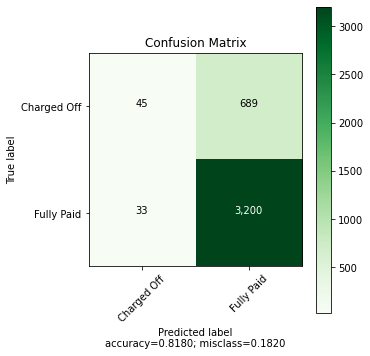

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens,  
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
 
    if cmap is None:
        cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(5, 5))   # (15,12)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    # plt.savefig('./confusionmatrix350.png',dpi=350)  # dpi分辨率
    plt.show()


conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print(conf_mat)
plot_confusion_matrix(conf_mat, normalize=False, target_names=['Charged Off', 'Fully Paid'], title='Confusion Matrix')

In [115]:
#ROC AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

pro_lda = lda.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pro_lda[:,1],pos_label=1)# roc曲线

auc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % auc)
# or
roc_auc_score(y_test, pro_lda[:,1])

AUC: 0.712


0.7117649983860243

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


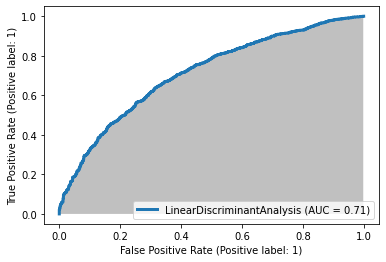

In [116]:
#绘图
metrics.plot_roc_curve(lda, X_test, y_test,linewidth=3)  # 画出roc曲线
plt.fill_between(fpr, tpr,where=(0<fpr) & (fpr<1), facecolor='silver')#填充auc区域
plt.savefig('ROC.png', dpi=400)